**Logistical Regression by using a neural network**

In [1]:
import math
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('WineQT.csv' , sep = ',')
df.drop('Id', axis = 1, inplace = True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [3]:
def classify_quality(quality): #Making it binary for logistical regression. 0 = undrinkable 1 = drinkable
    return 1 if quality > 5 else 0

In [4]:
df['quality'] = df['quality'].apply(classify_quality)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1


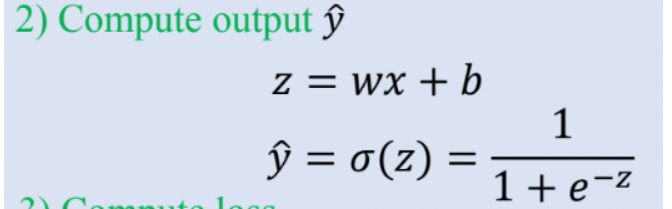

In [5]:
#Calculating z using the numpy.dot (it multiplies every feature with the corresponding weight)
def calc_z(weights,x,bias):
    return np.dot(weights, x) + bias

In [6]:
def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))  #Sigmoid-Function to only output values between 0 and 1

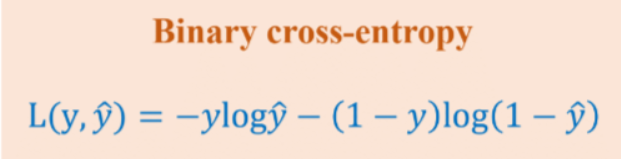

In [7]:
#loss function between y and y_hat (Binary cross entropy)
def Bce(y_hat,y):
    # Clip y_hat to avoid log(0)
    y_hat = np.clip(y_hat, 1e-15, 1 - 1e-15)  #Prevent division by zero
    return - (y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat))   

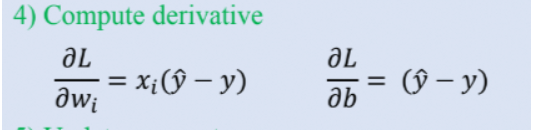

In [8]:
def derivative_x (y_hat,y,x):
    return x*(y_hat-y) 

def derivative_b (y_hat,y):
    return y_hat-y

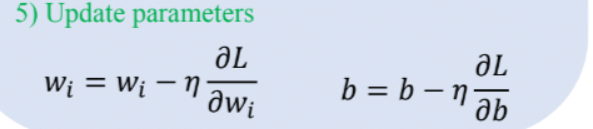

In [9]:
def updateweights(weights,lr,derivative_x):
    return weights - lr* derivative_x

def updatebias(bias,lr,derivative_b): 
    return bias -lr* derivative_b

In [10]:
from sklearn.model_selection import train_test_split #for splitting model into training and testing

In [11]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
        'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].values
y = df['quality'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape

(914, 11)

In [13]:
#Initializing random weight, bias and learning rate 
weights = np.random.uniform(-1, 1, 11)  # Initialize weights randomly
bias = np.random.uniform(-1,1,1)
rows = X_train.shape[0]

In the following we will combine the 5 steps from the lectures using the pre-defined functions.

In [14]:
def train_model(X_train, y_train, weights, bias, rows, epoch, lr,):
    print(weights)
    for epochs in range(epoch):
        total_loss = 0
        for i in range(rows):
            z = calc_z(weights, X_train[i], bias) 
            y_hat = sigmoid(z) #calculate expected y value
            loss = Bce(y_hat,y_train[i])
            total_loss = total_loss + loss
            deriv_x = derivative_x(y_hat, y_train[i], X_train[i]) 
            deriv_b = derivative_b(y_hat, y_train[i])
            weights = updateweights(weights, lr, deriv_x)
            bias = updatebias(bias, lr, deriv_b)
        if epochs % 10 == 0:
            print(f'Epoche {epochs}, Average Loss: {total_loss/rows}') 
    return weights, bias

In [15]:
trained_weights, trained_bias = train_model(X_train, y_train, weights, bias, rows, 500, 0.0001)

[-0.14051818  0.58805898  0.2619787  -0.55001322  0.22507572  0.32992056
 -0.68147029  0.66038528 -0.98635359  0.54359504 -0.4555452 ]
Epoche 0, Average Loss: [2.58373569]
Epoche 10, Average Loss: [-0.03351664]
Epoche 20, Average Loss: [-0.03641427]
Epoche 30, Average Loss: [-0.03778103]
Epoche 40, Average Loss: [-0.03843359]
Epoche 50, Average Loss: [-0.0385432]
Epoche 60, Average Loss: [-0.03829246]
Epoche 70, Average Loss: [-0.03781653]
Epoche 80, Average Loss: [-0.03720618]
Epoche 90, Average Loss: [-0.03652024]
Epoche 100, Average Loss: [-0.03579625]
Epoche 110, Average Loss: [-0.03505786]
Epoche 120, Average Loss: [-0.03431979]
Epoche 130, Average Loss: [-0.03359103]
Epoche 140, Average Loss: [-0.032877]
Epoche 150, Average Loss: [-0.03218079]
Epoche 160, Average Loss: [-0.03150409]
Epoche 170, Average Loss: [-0.03084768]
Epoche 180, Average Loss: [-0.03021176]
Epoche 190, Average Loss: [-0.02959621]
Epoche 200, Average Loss: [-0.02900067]
Epoche 210, Average Loss: [-0.02842466]


In [16]:
correct_predictions = 0 
total_predictions = len(X_test)

for i in range(total_predictions):  # 
    z = calc_z(X_test[i], trained_weights, trained_bias)  
    prob = sigmoid(z)  # Calculate probability
    
    # Convert probability to binary output (0 or 1)
    prediction = 1 if prob > 0.5 else 0
    if prediction == y_test[i]:  # If the prediction matches the actual value
        correct_predictions += 1
        
accuracy = (correct_predictions / total_predictions) *100
print(f'The Accuracy that the neural network predicts the right outcome is: {accuracy}%')

The Accuracy that the neural network predicts the right outcome is: 71.61572052401746%


**References** \
WhineQT.csv file : "https://www.kaggle.com/datasets/yasserh/wine-quality-dataset?resource=download" \
Numpy library : "https://numpy.org" \
Pandas library: "https://pandas.pydata.org" \
math library : "https://docs.python.org/3/library/math.html" \
lecture files : "https://www.dropbox.com/scl/fo/7w9vvq7r6b7w0ffn7lfv9/AJlC3jzQeZIc5YuEmS5H8Ys?e=2&preview=From+Linear+Regression+to+Logistic+Regression.pdf&rlkey=5tx1qycellowj4e67nyu9ok5q&dl=0"